In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("laptopPrice.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [3]:
# Remove ' GB' and convert to integers
data['ram_gb'] = data['ram_gb'].str.replace(' GB', '').astype(int)
data['ssd'] = data['ssd'].str.replace(' GB', '').astype(int)
data['hdd'] = data['hdd'].str.replace(' GB', '').astype(int)
data['graphic_card_gb'] = data['graphic_card_gb'].str.replace(' GB', '').astype(int)
# Convert 'os_bit' from string to integer
data['os_bit'] = data['os_bit'].str.replace('-bit', '').astype(int)
# Convert 'rating' from "X stars" to numeric
data['rating'] = data['rating'].str.extract('(\d+)').astype(float)


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shreeya\AppData\Local\Temp\ipykernel_21496\663338244.py:9: SyntaxWarning: invalid escape sequence '\d'
  data['rating'] = data['rating'].str.extract('(\d+)').astype(float)


In [4]:
# spliting dataset into numeric and categoricals
numericals = data.select_dtypes(include=['int64', 'float64'])
categoricals = data.select_dtypes(include=['O'])
categorical_cols = [
    'brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
    'ram_type', 'os' ,"weight" , "warranty", "Touchscreen", "msoffice",
]

for cat in categorical_cols :
    print(categoricals[cat].value_counts())

brand
ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: count, dtype: int64
processor_brand
Intel    610
AMD      189
M1        24
Name: count, dtype: int64
processor_name
Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 9          26
Ryzen 3          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: count, dtype: int64
processor_gnrtn
11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: count, dtype: int64
ram_type
DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64
os
Windows    779
Mac         28
DOS         16
Name: count, dtype: int64
weight
Casual        520
ThinNlight    264
Gaming         39
Name: count, dtype: int64
warranty
1 year   

In [5]:

## making dictionary for each categorical column
categorical_dict = {}
for col in categorical_cols:
    categorical_dict[col] = {val: i for i, val in enumerate(data[col].unique())}
    print(categorical_dict[col])
    categoricals[col] = data[col].map(categorical_dict[col])

{'ASUS': 0, 'Lenovo': 1, 'acer': 2, 'Avita': 3, 'HP': 4, 'DELL': 5, 'MSI': 6, 'APPLE': 7}
{'Intel': 0, 'AMD': 1, 'M1': 2}
{'Core i3': 0, 'Core i5': 1, 'Celeron Dual': 2, 'Ryzen 5': 3, 'Core i7': 4, 'Core i9': 5, 'M1': 6, 'Pentium Quad': 7, 'Ryzen 3': 8, 'Ryzen 7': 9, 'Ryzen 9': 10}
{'10th': 0, 'Not Available': 1, '11th': 2, '7th': 3, '8th': 4, '9th': 5, '4th': 6, '12th': 7}
{'DDR4': 0, 'LPDDR4': 1, 'LPDDR4X': 2, 'DDR5': 3, 'DDR3': 4, 'LPDDR3': 5}
{'Windows': 0, 'DOS': 1, 'Mac': 2}
{'Casual': 0, 'ThinNlight': 1, 'Gaming': 2}
{'No warranty': 0, '1 year': 1, '2 years': 2, '3 years': 3}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}


In [6]:
categoricals


,brand,processor_brand,processor_name,processor_gnrtn,ram_type,os,weight,warranty,Touchscreen,msoffice
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
818,0,1,10,1,0,0,0,1,0,0
819,0,1,10,1,0,0,0,1,0,0
820,0,1,10,1,0,0,0,1,0,0
821,0,1,10,1,0,0,0,1,0,0


In [7]:
final_data = pd.concat([numericals, categoricals], axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ram_gb             823 non-null    int64  
 1   ssd                823 non-null    int64  
 2   hdd                823 non-null    int64  
 3   os_bit             823 non-null    int64  
 4   graphic_card_gb    823 non-null    int64  
 5   Price              823 non-null    int64  
 6   rating             823 non-null    float64
 7   Number of Ratings  823 non-null    int64  
 8   Number of Reviews  823 non-null    int64  
 9   brand              823 non-null    int64  
 10  processor_brand    823 non-null    int64  
 11  processor_name     823 non-null    int64  
 12  processor_gnrtn    823 non-null    int64  
 13  ram_type           823 non-null    int64  
 14  os                 823 non-null    int64  
 15  weight             823 non-null    int64  
 16  warranty           823 non

In [8]:
# Check for null values
final_data["weight"].fillna(0, inplace=True)
final_data.info()

C:\Users\Shreeya\AppData\Local\Temp\ipykernel_21496\253443995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data["weight"].fillna(0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ram_gb             823 non-null    int64  
 1   ssd                823 non-null    int64  
 2   hdd                823 non-null    int64  
 3   os_bit             823 non-null    int64  
 4   graphic_card_gb    823 non-null    int64  
 5   Price              823 non-null    int64  
 6   rating             823 non-null    float64
 7   Number of Ratings  823 non-null    int64  
 8   Number of Reviews  823 non-null    int64  
 9   brand              823 non-null    int64  
 10  processor_brand    823 non-null    int64  
 11  processor_name     823 non-null    int64  
 12  processor_gnrtn    823 non-null    int64  
 13  ram_type           823 non-null    int64  
 14  os                 823 non-null    int64  
 15  weight             823 non-null    int64  
 16  warranty           823 non

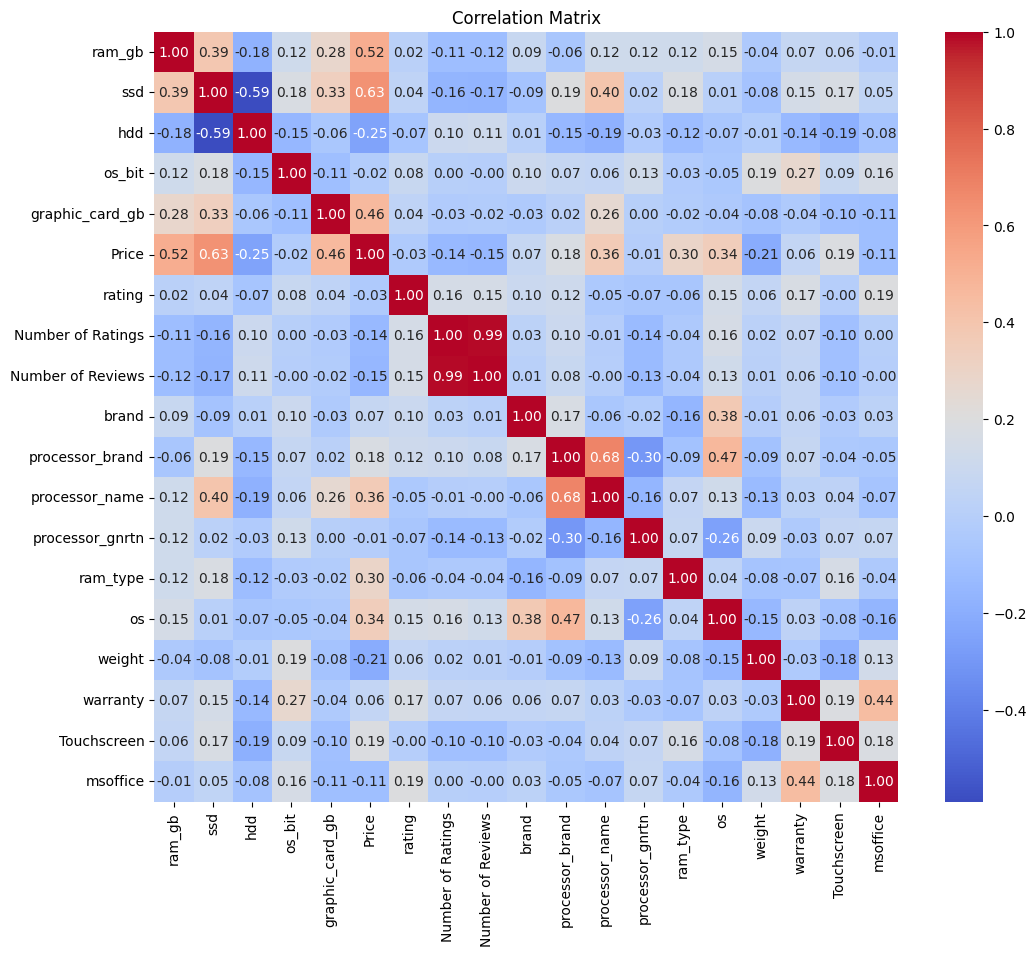

In [9]:
metrix = final_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(metrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
y = final_data['Price']
x = final_data.drop('Price',axis=1)

In [11]:
## spliting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [12]:
### trainig the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
model.score(x_test, y_test)


0.7554696932365993